In [2]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install -q seaborn
import seaborn as sns

In [7]:
csv_file_path = '/home/abalzer/Documents/github_clone/bachelor_thesis/pipeline/output/output_20250519_142700_machine_learning_human/Homo_sapiens/feature_matrix_with_go_terms.csv'
output_file = '/home/abalzer/Documents/github_clone/bachelor_thesis/pipeline/output/output_20250519_142700_machine_learning_human/Homo_sapiens/'
csv_file_path_all_organisms = '/home/abalzer/Documents/github_clone/bachelor_thesis/pipeline/output/output_20250603_145910_ml_all_organisms/Homo_sapiens_isoforms/feature_matrix_with_go_terms.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path_all_organisms)

In [ ]:
print(df.head(0))

/tmp/ipykernel_6122/3829724076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_mito_proteins['NAT_Type'] = not_mito_proteins[['NAT_NatA/D', 'NAT_NatB', 'NAT_NatC/E', 'NAT_Other']].idxmax(axis=1)
/tmp/ipykernel_6122/3829724076.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_mito_proteins['NAT_Type'] = 'Not Mito'
/tmp/ipykernel_6122/3829724076.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set

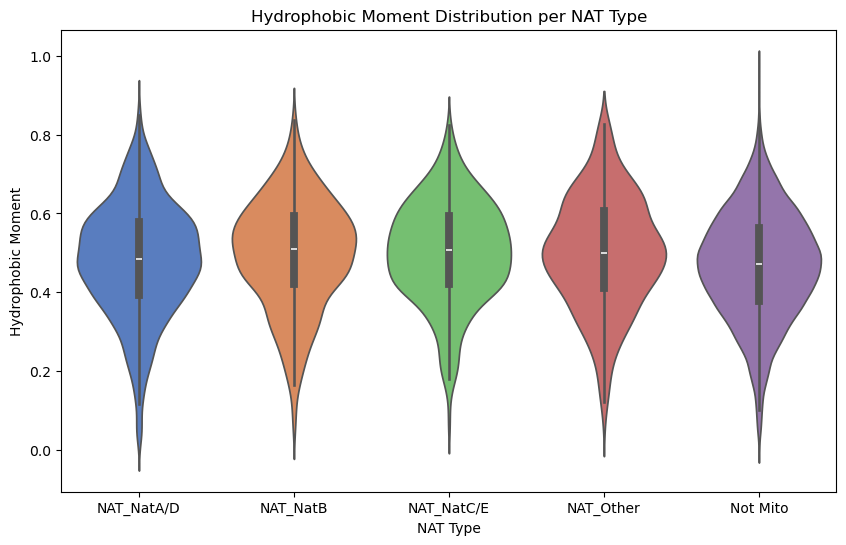

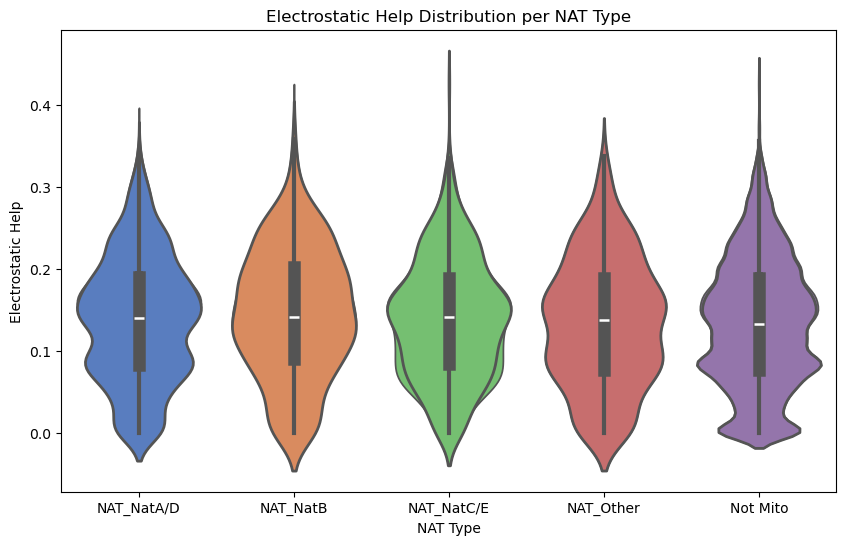

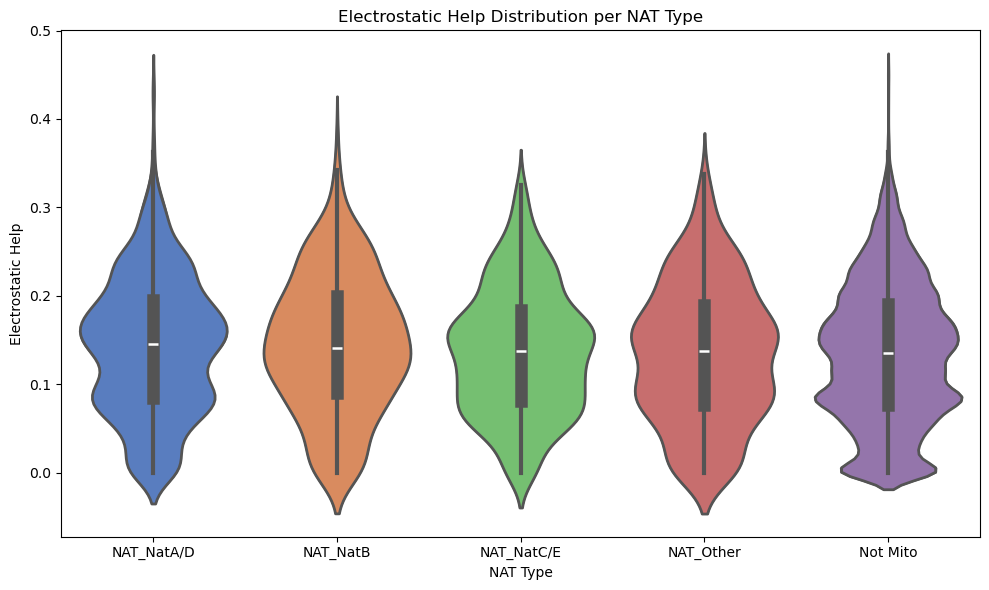

In [10]:
mito_df = df.copy()
mito_df = mito_df[(mito_df['GO_Term'] == "GO:0005739")]
not_mito_proteins = df[(df['GO_Term'] != "GO:0005739")]
not_mito_proteins['NAT_Type'] = not_mito_proteins[['NAT_NatA/D', 'NAT_NatB', 'NAT_NatC/E', 'NAT_Other']].idxmax(axis=1)
not_mito_proteins['NAT_Type'] = 'Not Mito'

NAT_NatAD = mito_df['NAT_NatA/D']
NAT_NatB = mito_df['NAT_NatB']
NAT_NatCE = mito_df['NAT_NatC/E']
NAT_Other = mito_df['NAT_Other']
# Combine the four NAT columns into a single column
mito_df['NAT_Type'] = mito_df[['NAT_NatA/D', 'NAT_NatB', 'NAT_NatC/E', 'NAT_Other']].idxmax(axis=1)

# Combine mito_df and not_mito_proteins for plotting
combined_df = pd.concat([mito_df, not_mito_proteins], ignore_index=True)

# Create a new dataframe with the NAT_Type column
nat_df = combined_df[['protein_id', 'NAT_Type']].copy()
nat_df = combined_df[['protein_id', 'NAT_Type', 'Hydrophobic Moment', 'Electrostatic Help','electrostatic help if diff nat', 'electrostatic help if huntington']].copy()
# Group by NAT_Type and calculate the mean for Hydrophobic_Moment and Electrostatic_Help
nat_means = nat_df.groupby('NAT_Type')[['Hydrophobic Moment', 'Electrostatic Help', 'electrostatic help if diff nat', 'electrostatic help if huntington']].mean()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))
# Create a violin plot for Hydrophobic Moment
sns.violinplot(x=nat_df['NAT_Type'], y=nat_df['Hydrophobic Moment'], ax=ax1, palette="muted")
ax1.set_xlabel('NAT Type')
ax1.set_ylabel('Hydrophobic Moment')
ax1.set_title('Hydrophobic Moment Distribution per NAT Type')

# Create a violin plot for Electrostatic Help on a new figure
fig, ax2 = plt.subplots(figsize=(10, 6))
sns.violinplot(x=nat_df['NAT_Type'], y=nat_df['Electrostatic Help'], ax=ax2, palette="muted")
ax2.set_xlabel('NAT Type')
ax2.set_ylabel('Electrostatic Help')
ax2.set_title('Electrostatic Help Distribution per NAT Type')

sns.violinplot(
    x=nat_df['NAT_Type'], 
    y=nat_df['electrostatic help if diff nat'], 
    ax=ax2, 
    palette="muted", 
    linewidth=2, 
    color='black'
)
# Create a violin plot for Electrostatic Help on a new figure
fig, ax3 = plt.subplots(figsize=(10, 6))
sns.violinplot(x=nat_df['NAT_Type'], y=nat_df['Electrostatic Help'], ax=ax3, palette="muted")
ax3.set_xlabel('NAT Type')
ax3.set_ylabel('Electrostatic Help')
ax3.set_title('Electrostatic Help Distribution per NAT Type')

sns.violinplot(
    x=nat_df['NAT_Type'], 
    y=nat_df['electrostatic help if huntington'], 
    ax=ax3, 
    palette="muted", 
    linewidth=2, 
    color='black'
)
plt.tight_layout()
plt.show()



In [ ]:
mito_df = df.copy()
mito_df = mito_df[(mito_df['GO_Term'] == "GO:0005739")]
sequence = mito_df['Sequence']
start_of_alpha_helix = mito_df['start_of_alpha_helix']
length_of_alpha_helix = mito_df['length_of_alpha_helix']
end_of_alpha_helix = start_of_alpha_helix + length_of_alpha_helix - 1
mito_df['end_of_alpha_helix'] = end_of_alpha_helix
# Count how often each position is part of an alpha helix
sequence_length = sequence.str.len().max()
position_counts = [0] * sequence_length
start_counts = [0] * sequence_length
end_counts = [0] * sequence_length

for start, end in zip(start_of_alpha_helix, end_of_alpha_helix):
    for pos in range(start, end + 1):
        if pos < sequence_length:
            position_counts[pos] += 1
    if start < sequence_length:
        start_counts[start] += 1
    if end < sequence_length:
        end_counts[end] += 1

# Plot the data
plt.figure(figsize=(12, 6))
positions = range(sequence_length)

# Blue histogram for positions part of an alpha helix
plt.bar(positions, position_counts, color='blue', alpha=0.6, label='Part of Alpha Helix')

# Green scatter plot for start of alpha helix
plt.scatter(positions, start_counts, color='green', label='Start of Alpha Helix')

# Red scatter plot for end of alpha helix
plt.scatter(positions, end_counts, color='red', label='End of Alpha Helix')

plt.xlabel('Position in Sequence')
plt.ylabel('Frequency')
plt.title('Alpha Helix Position Analysis')
plt.legend()
plt.tight_layout()
plt.show()